# Лабораторная работа 4. Предобработка данных

In [ ]:
! pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 83.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import pymorphy3
import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv("./tproger_data.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

### Анализ выбросов

In [ ]:
numerical_features = ['views', 'reactions', 'comments']

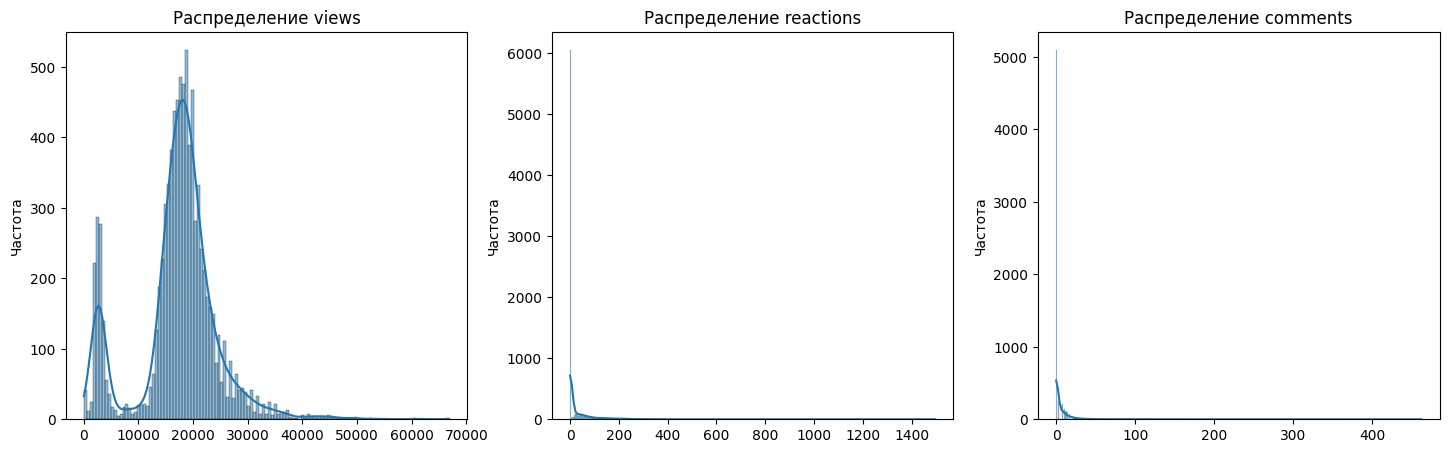

In [ ]:
num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
fig.tight_layout(pad=3.0)

# Приведение к 2D массиву, если нужно
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(df[numerical_features]):
    row, col = divmod(i, num_columns)
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

# Удаление пустых осей
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()


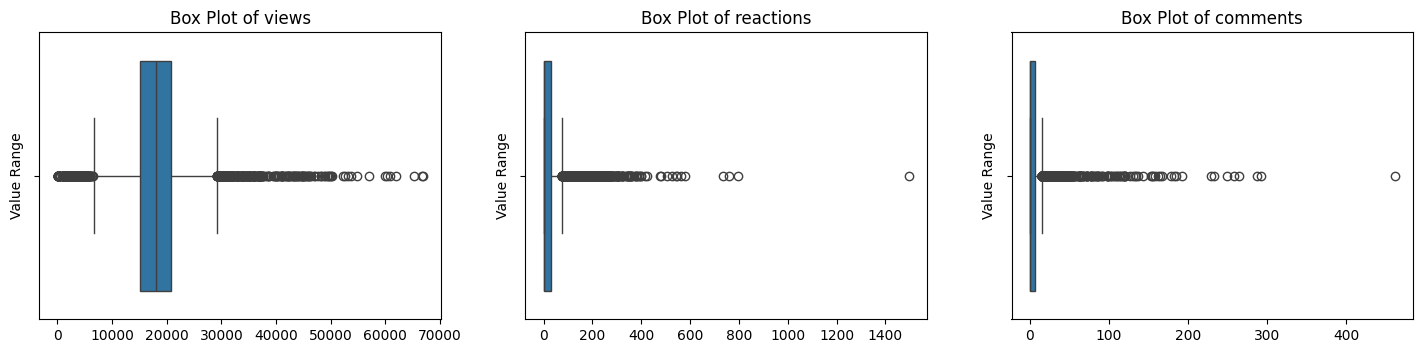

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4))
fig.tight_layout(pad=3.0)

# Приводим axes к 2D-массиву, если нужно
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)  # делаем (1, num_columns)
if num_columns == 1:
    axes = np.expand_dims(axes, axis=1)  # делаем (num_rows, 1)

for i, column in enumerate(numerical_features):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

# Удаляем лишние пустые оси
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

In [ ]:
columns = ['reactions', 'comments']

for column in columns:
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
   df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
outliers

,id_post,date,text,views,reactions,comments,hour,weekday
37,13248,2025-04-05 08:19:53+00:00,"**Всё программирование, которое должен знать П...",11179,37,12,8,Saturday
50,13221,2025-03-30 11:44:01+00:00,**Переключение между контекстами убивает эффек...,13758,71,13,11,Sunday
65,13197,2025-03-23 09:22:39+00:00,[**XPipe**](https://github.com/xpipe-io/xpipe?...,15863,49,46,9,Sunday
70,13186,2025-03-20 15:33:01+00:00,**Spotube: кросс-платформенный клиент Spotify ...,15651,52,13,15,Thursday
80,13175,2025-03-15 14:02:41+00:00,**Необычные способы ~~изобрести велосипед~~ хо...,15884,47,13,14,Saturday
...,...,...,...,...,...,...,...,...
4309,6149,2020-10-02 16:37:09+00:00,**Компания DigitalOcean запустила Hacktoberfes...,18945,0,12,16,Friday
4310,6147,2020-10-02 13:03:03+00:00,[​](http://chnly.pro/file/71afb02fab514ae6943b...,19695,0,11,13,Friday
4312,6142,2020-10-01 18:33:03+00:00,[​](http://chnly.pro/file/24cecc118f5e42378014...,19999,0,38,18,Thursday
4314,6139,2020-10-01 08:16:05+00:00,**Теперь на языке Swift можно создавать прилож...,20527,0,12,8,Thursday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id_post    8750 non-null   int64              
 1   date       8750 non-null   datetime64[ns, UTC]
 2   text       8750 non-null   object             
 3   views      8750 non-null   int64              
 4   reactions  8750 non-null   int64              
 5   comments   8750 non-null   int64              
 6   hour       8750 non-null   int32              
 7   weekday    8750 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(4), object(2)
memory usage: 512.8+ KB


In [ ]:
num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
fig.tight_layout(pad=3.0)

# Приведение к 2D массиву, если нужно
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(df[numerical_features]):
    row, col = divmod(i, num_columns)
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

# Удаление пустых осей
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

NameError: name 'numerical_features' is not defined

In [ ]:
df.describe()

,id_post,views,reactions,comments,hour
count,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000
mean,5056.588378,17141.631356,7.207476,1.060684,12.677209
std,3475.960597,8068.582442,16.626364,2.274378,4.283832
min,278.000000,30.000000,0.000000,0.000000,0.000000
25%,2089.750000,14735.750000,0.000000,0.000000,9.000000
50%,4382.000000,18490.000000,0.000000,0.000000,12.000000
75%,7471.750000,21527.250000,0.000000,0.000000,16.000000
max,13300.000000,66829.000000,74.000000,9.000000,23.000000


### Нужное

Добавим метку

In [ ]:
df.describe()

,id_post,views,reactions,comments,hour
count,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000
mean,6257.979314,17360.961257,27.378629,5.574057,12.367543
std,3826.691349,7506.308143,61.328095,15.384208,4.149206
min,278.000000,30.000000,0.000000,0.000000,0.000000
25%,2845.250000,15140.250000,0.000000,0.000000,9.000000
50%,6045.000000,17991.000000,0.000000,0.000000,12.000000
75%,9590.750000,20763.500000,30.000000,6.000000,16.000000
max,13302.000000,66829.000000,1496.000000,462.000000,23.000000


In [ ]:
df['popularity'] = (df['views'] > 18000).astype(int)

In [ ]:
df['popularity'].value_counts()


,count
popularity,
0,4387
1,4363


Делим на выборки

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['popularity'])
train_df, val_df = train_test_split(train_val_df, test_size=0.15, random_state=42, stratify=train_val_df['popularity'])

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 6321
Validation size: 1116
Test size: 1313


In [ ]:
train_df.head()

,id_post,date,text,views,reactions,comments,hour,weekday,popularity
5034,4989,2020-02-11 11:27:03+00:00,**«Клавиатуры Apple просто кошмарные»**\n\nТай...,24190,0,0,11,Tuesday,1
3893,6772,2021-01-14 14:37:31+00:00,[​​](https://telegra.ph/file/db52690d951f25b63...,19172,1,24,14,Thursday,1
7603,1501,2017-04-30 12:51:05+00:00,Google запустила новый курс для разработчиков....,9240,0,0,12,Sunday,0
1504,10761,2023-05-23 11:45:00+00:00,[​](https://telegra.ph/file/5dbe062e7dd0301078...,15515,40,15,11,Tuesday,0
7859,1217,2017-03-14 08:44:56+00:00,Поисковик Google наконец научился обрабатывать...,2857,0,0,8,Tuesday,0


Предобработка

In [ ]:
nltk.download('stopwords')
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def is_cyrillic(word):
    return bool(re.fullmatch(r'[а-яё]+', word))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zа-яё\s]', '', text)

    tokens = text.split()

    cleaned_tokens = []
    for token in tokens:
        if token in stop_words:
            continue
        if is_cyrillic(token):
            token = morph.parse(token)[0].normal_form
        cleaned_tokens.append(token)

    return ' '.join(cleaned_tokens)

In [ ]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
val_df['clean_text'] = val_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

In [ ]:
#Доп. признаки
datasets = [train_df, val_df, test_df]

for df in datasets:
    df['text_length'] = df['clean_text'].apply(len)
    df['engagement'] = df['reactions'] + df['comments']
    df['engagement_rate'] = df['engagement'] / df['views']

In [ ]:
train_df.to_csv('./train_dataset.csv', index=False, encoding='utf-8')
val_df.to_csv('./val_dataset.csv', index=False, encoding='utf-8')
test_df.to_csv('./test_dataset.csv', index=False, encoding='utf-8')

In [ ]:
train_df

,id_post,date,text,views,reactions,comments,hour,weekday,popularity,clean_text,text_length,engagement,engagement_rate
5034,4989,2020-02-11 11:27:03+00:00,**«Клавиатуры Apple просто кошмарные»**\n\nТай...,24190,0,0,11,Tuesday,1,клавиатура apple просто кошмарный тайка вайтит...,330,0,0.000000
3893,6772,2021-01-14 14:37:31+00:00,[​​](https://telegra.ph/file/db52690d951f25b63...,19172,1,24,14,Thursday,1,заменить участник голубой огонёк николас кейдж...,149,25,0.001304
7603,1501,2017-04-30 12:51:05+00:00,Google запустила новый курс для разработчиков....,9240,0,0,12,Sunday,0,google запустить новый курс разработчик посвят...,111,0,0.000000
1504,10761,2023-05-23 11:45:00+00:00,[​](https://telegra.ph/file/5dbe062e7dd0301078...,15515,40,15,11,Tuesday,0,знать код страница найти возможно ещё парочка ...,133,55,0.003545
7859,1217,2017-03-14 08:44:56+00:00,Поисковик Google наконец научился обрабатывать...,2857,0,0,8,Tuesday,0,поисковик google научиться обрабатывать спецси...,99,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,3456,2019-02-03 11:16:07+00:00,**Развёрнутое руководство по Sass/SCSS**\n\nht...,24259,0,0,11,Sunday,1,развернуть руководство sassscss современный cs...,323,0,0.000000
3183,7849,2021-08-05 10:35:25+00:00,[​](http://chnly.pro/file/305a115d080a42c7a6b9...,18215,0,4,10,Thursday,1,вопрос который точно стоить задать работодател...,351,4,0.000220
1069,11374,2023-11-02 14:01:37+00:00,**Подборка актуальных вакансий**\n\n— [Специал...,13645,18,0,14,Thursday,0,подборка актуальный вакансия специалист технич...,701,18,0.001319
4041,6554,2020-12-09 05:45:04+00:00,**Microsoft запатентовала рейтинг для оценки с...,18028,0,0,5,Wednesday,1,microsoft запатентовать рейтинг оценка совещан...,465,0,0.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6321 entries, 5034 to 1628
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id_post          6321 non-null   int64              
 1   date             6321 non-null   datetime64[ns, UTC]
 2   text             6321 non-null   object             
 3   views            6321 non-null   int64              
 4   reactions        6321 non-null   int64              
 5   comments         6321 non-null   int64              
 6   hour             6321 non-null   int32              
 7   weekday          6321 non-null   object             
 8   popularity       6321 non-null   int64              
 9   clean_text       6321 non-null   object             
 10  text_length      6321 non-null   int64              
 11  engagement       6321 non-null   int64              
 12  engagement_rate  6321 non-null   float64            
dtypes: datetime64[ns, UT